# NESM Python Workshop Part 1

## Overview

- Introductions
- Conda
- Jupyter notebook overview
- Pure python - loops and lists
- Numpy
- Plotting with matplotlib
- Image data

### Download the workshop materials from github
https://github.com/Hekstra-Lab/nesm-python

Click the green button in the top right that says "Code" and then "Dowload Zip" (Or if you are familiar with git you can clone the repo)

## Conda Environments

Python has a standard library for doing many useful tasks but you will often want to install other python libraries. At a surface level, `conda` provides an easy way to install packages.

> Conda is an open source package management system and environment management system that runs on Windows, macOS and Linux. Conda quickly installs, runs and updates packages and their dependencies. Conda easily creates, saves, loads and switches between environments on your local computer. It was created for Python programs, but it can package and distribute software for any language. ([conda docs](https://docs.conda.io))

**How**

1. Open a terminal (mac or linux) or the Anaconda Prompt (windows)
1. Type the following and press enter: `conda create -n nesm python`. This uses `conda` to create a new environment with the name (`-n`) `nesm`. It will install the latest python version in that environment. Whenever you are starting a new project, it is best to create a new environement.
1. `conda info --envs` -- this will list all the environments on your computer. Note that `base` is the default. The `*` next to an environement means that you are currently using that environment.
1. `conda activate nesm` -- Switch to using the newly created `nesm` environment. (If you run `conda info --envs` again you will see that the `*` has moved.)
1. `conda install -c conda-forge numpy scipy matplotlib jupyterlab xarray scikit-image ipympl dask scikit-learn` -- This line uses `conda` to  `install` several common python libraries. We will use all of them in this workshop (time permitting). We also specify to install these libraries from `conda-forge` which is the community maintatined repository for conda installable software. This is where the most up to date versions of software are.
1. `pip install mpl_interactions tifffile dask_labextension hyperspy 'napari[all]'` - This uses `pip` the default python package installer to install a few extra libraries that are not available through conda.

### Launch Jupyter Lab

Type `jupyter lab` in the terminal window and press enter. Eventually a window should open in your browser that looks like this one.


### Working in Jupyter Notebooks

**The Essentials**
- `Shift + Enter` executes a cell
- `Shift + Tab` shows the documentation of a function
- `Tab` will attempt to auto-complete the word you are typing

**Cell Operations**
- There are two modes in a jupyter notebook: *Edititing* mode is where you are editing text in a cell. *Command* mode is when you are outside of a cell. `Esc` while in a cell switches to command mode. `Enter` will select a cell and enter editing mode there if you are in command mode.

- `Esc + a` makes a new cell *above* your current position 
- `Esc + b` makes a new cell *below* your current position
- `Esc + m` converts a cell into a markdown cell
- `Esc + y` converts a cell into a code cell.
- `Esc + d + d` deletes a cell
- `Esc + i + i` interrupts the execution of a cell
- `Esc + 0 + 0` stops execution and restarts the kernel
- If you really get into it, you can make custom keyboard shortcuts in `Settings > Advanced Settings > Keyboard Shortcuts`

There are also jupyter lab extensions that can really improve the experience of using jupyter lab. A very good list of these extensions is called [Awesome Jupyter](https://github.com/markusschanta/awesome-jupyter).

## Pure Python 

We are just going to touch on a few key parts here that will most directly build into image analysis. It is defintely worth spending some time to familiarize yourself with the python standard library.  

### Lists

#### Indexing

Lists are ordered groups of objects. You can access the elements of a list with *indexing*.
- Use square brackets to denote indexing operations 
- Python is *zero-indexed* meaning that the first element has index 0
- You can also index relative to the end of the list with negative indexing.

<img src="images/1d_indexing.png" alt="1D indexing" width="400"/>

In [1]:
my_list = [1,3,7,13,21] 

In [2]:
list2 = [1, "john", [3,4,5]]

In [3]:
# get the third element from the list
my_list[2]

7

In [4]:
# get the second to last element of the list
my_list[-2]

13

#### Essential List Methods
- `len` - return the number of elements in a list
- `.append` - add items to the end of a list

In [5]:
# get the length of the list
len(my_list)

5

In [6]:
# add some items
my_list.append(42)

In [7]:
my_list

[1, 3, 7, 13, 21, 42]

In [8]:
len(my_list)

6

In [9]:
# a common workflow involves starting with an empty list
results = []
# and appending things as you go 
results.append(...)

#### Lists of lists (of lists of....)

Since lists can contain arbitrary python objects, they can also contain more lists. To access specific items 

In [10]:
ptriples = [[3,4,5],[5,12,13],[7,24,25],[8,15,17]]

In [11]:
#look at the first element
ptriples[1]

[5, 12, 13]

In [12]:
len(ptriples)

4

In [13]:
#look at an individual number
ptriples[1][-1]

13

## For Loops

For loops are a workhorse of python programming (and many other languages). We will look at three common for loop constructions.

**Range**

In [14]:
for i in range(10): #generate all the integers from 0 to 9
    print(i, i*i)

0 0
1 1
2 4
3 9
4 16
5 25
6 36
7 49
8 64
9 81


**Iterables**

A common thing to do is loop over a list. Naively you would do something like:

```python
for i in range(len(my_list)):
    x = my_list[i]
    #do something with x
 ```
 
But there is a more efficient way. Lists are *iterable* so for loops can loop over their elements directly.

In [15]:
for trip in ptriples:
    print(trip, trip[0]**2 + trip[1]**2, trip[-1]**2)

[3, 4, 5] 25 25
[5, 12, 13] 169 169
[7, 24, 25] 625 625
[8, 15, 17] 289 289


**Enumeration**

Sometimes, you also want the index of the list you are iterating over, e.g. you want to refer to a corresponding element in another list.

In [16]:
for i, trip in enumerate(ptriples):
    print(i, trip)

0 [3, 4, 5]
1 [5, 12, 13]
2 [7, 24, 25]
3 [8, 15, 17]


## Breakout exercises

1. Work together!
1. We recommend that one person share their screen so everyone can see a common notebook.
1. We will go around the breakout rooms to answer questions.


### 1. Triangular numbers

The [triangular numbers](https://en.wikipedia.org/wiki/Triangular_number) are given by
$$a(0)=0$$
$$a(1)=1$$
$$a(n)=a(n−1)+n$$


The first 5 triangular numbers are: `[0, 1, 3, 6, 10]`

Create a list of the 1000 triangular numbers. If you get this correct then the final item in the list should be `499500`.

You can print out the final item with (`print(tri[-1])`).

In [17]:
# seed the first element of the sequence
tri = [0]
# start with n=1 because we already defined the first element.
for i in range(1, 1000):
    # your code here
    #tri[i] bad wont work!
    tri.append(tri[i-1]+i)

In [18]:
print(tri[-1])

499500


### 2. Tetrahedral numbers


The sum of the first N triangular numbers gives the Nth [Tetrahedral number](https://en.wikipedia.org/wiki/Tetrahedral_number).

As a concrete example the first few tetrahedral numbers are given by:

$$Tetra_1 = a(0) + a(1) =  0 + 1$$
$$Tetra_2 =  a(0) + a(1) + a(2) = 0 + 1 + 3$$

Create an array of the first 999 Tetrahedral numbers. If you did this correctly then the last element should be `166666500`

The first 5 elements of this sequence are: `[1, 4, 10, 20, 35, ...]`

Hint: You may need to use two for loops for this but it will be faster if you can do it with a single loop.

### 3. Temperature Conversion

In the next cell we've defined a variable `room_temp` that is a 2D list. This represents the temperature of a surface measured at equally spaced points. The data is visualized below.

<img src="../images/surface_temp.png" alt="surface-temperature" width="400"/>

Unfortunately it's been measured in Farhenheit. So using `for` loops make a new array named `room_temp_celsius` and fill it with the values of `room_temp` but converted to celsius. The conversion formula is:
$$C = \frac{F- 32}{1.8}$$

In [19]:
room_temp = [
    [72, 72, 68, 73, 72],
    [68, 73, 70, 67, 68],
    [72, 68, 69, 73, 72],
    [72, 68, 69, 74, 71],
    [70, 73, 72, 68, 71]
]

In [20]:
celsius = []
for i in range(len(room_temp)):
    celsius.append([]) # new row
    for j in range(len(room_temp[i])):
        f = room_temp[i][j]
        c = (f-32)/(1.8)
        celsius[i].append(c)

In [21]:
print(celsius)

[[22.22222222222222, 22.22222222222222, 20.0, 22.77777777777778, 22.22222222222222], [20.0, 22.77777777777778, 21.11111111111111, 19.444444444444443, 20.0], [22.22222222222222, 20.0, 20.555555555555554, 22.77777777777778, 22.22222222222222], [22.22222222222222, 20.0, 20.555555555555554, 23.333333333333332, 21.666666666666668], [21.11111111111111, 22.77777777777778, 22.22222222222222, 20.0, 21.666666666666668]]


In [22]:
print(room_temp)

[[72, 72, 68, 73, 72], [68, 73, 70, 67, 68], [72, 68, 69, 73, 72], [72, 68, 69, 74, 71], [70, 73, 72, 68, 71]]


## 4. More dimensions

Now assume that we measure the temperature at the same points on the surface over a period of time. 

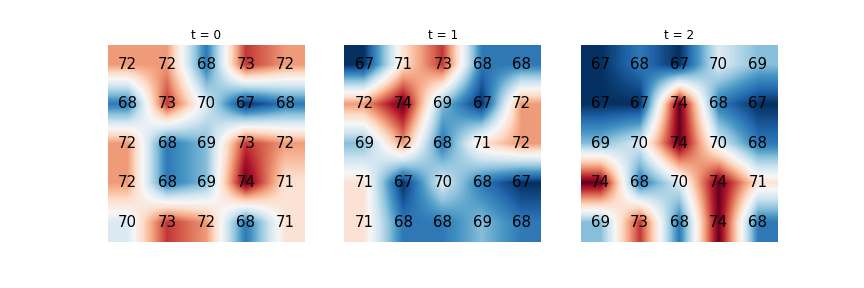

The variable `room_temp_3d` has three dimensions. Make a new array of this data converted to celsisus.

In [23]:
room_temp_3d = [
    [[72, 72, 68, 73, 72],
    [68, 73, 70, 67, 68],
    [72, 68, 69, 73, 72],
    [72, 68, 69, 74, 71],
    [70, 73, 72, 68, 71]],

    [[67, 71, 73, 68, 68],
    [72, 74, 69, 67, 72],
    [69, 72, 68, 71, 72],
    [71, 67, 70, 68, 67],
    [71, 68, 68, 69, 68]],

    [[67, 68, 67, 70, 69],
    [67, 67, 74, 68, 67],
    [69, 70, 74, 70, 68],
    [74, 68, 70, 74, 71],
    [69, 73, 68, 74, 68]]
]


In [24]:
celsius_3d = []
for i in range(len(room_temp_3d)):
    celsius_3d.append([]) 
    for j in range(len(room_temp_3d[i])):
        celsius_3d[i].append([])
        for k in range(len(room_temp_3d[i][j])):
            celsius_3d[i][j].append((room_temp_3d[i][j][k]-32)/1.8)

## Numpy

### What are Numpy Arrays?

Arrays are like lists that are highly optimized for numerical data. They sacrifice some of the flexiblity of python lists for much higher performance.

See https://numpy.org/doc/stable/user/absolute_beginners.html

**Poll**: How much faster do you think arrays are than lists and for loops?

In [25]:
from math import sin
from time import perf_counter # time different operations
import numpy as np #always want this

In [26]:
N = 10000000
arr_list = list(range(N))

In [27]:
# time math.sin + for loop
t0 = perf_counter()
results =[]
for x in arr_list:
    results.append(sin(x))
tf = perf_counter()
t_loop = tf - t0

In [28]:
t_loop #seconds

1.989577542

In [29]:
# make a numpy array
arr = np.arange(N)  #np.array(arr_list)

In [30]:
arr

array([      0,       1,       2, ..., 9999997, 9999998, 9999999])

In [31]:
# time np.sin
t0 = perf_counter()
np_results = np.sin(arr)
tf = perf_counter()
t_arr = tf - t0

In [32]:
print(t_loop/t_arr)

7.279327249977414


### How to create arrays

**From a list**: we can just call np.array(list) to turn that list into a numpy array. But be careful the lists need to be shaped like a valid matrix.

In [33]:
# turn the ptriples list into a numpy array and look at it's shape
np.array(ptriples)

array([[ 3,  4,  5],
       [ 5, 12, 13],
       [ 7, 24, 25],
       [ 8, 15, 17]])

In [34]:
# or any old list that you type out
np.array([1,4,7,9,21])

array([ 1,  4,  7,  9, 21])

Manually typing out lists sucks.

Numpy provides many functions for initializing common arrays.

- Methods giving you specific numbers
    - [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange) Use this to generate lists of integers
    - [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) use this to generate lists of evenly spaced numbers. For example to evaluate a function at many values between 0 and 1
    
- Methods where you give the shape of an array
    - [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros) give an array of zeros in the shape you specify
    - [zeros_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros_like) gives an array of zeros in the shape of anther array
    - [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones) same as zeros except filled with ones
    - [ones_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones_like) sames as zeros_like except filled with ones

In [35]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [36]:
np.zeros((5))

array([0., 0., 0., 0., 0.])

### Vectorized operations - No more loops!

Consider the simple problem of multiplying every element in a list/array by 5. For a list we would need to do something like 

```python
data = [3, 10, 0, 4, 8, 1]
new_list = []
for i in range(len(data)):
    new_list.append(data[i] * 5)
```

with Numpy we can do this much more succinctly.

In [37]:
data = np.array([3,10,0,4,8,1])

In [38]:
5*data

array([15, 50,  0, 20, 40,  5])

Changing arrays inplace

In [39]:
data

array([ 3, 10,  0,  4,  8,  1])

In [40]:
data[2]=-1

In [41]:
data

array([ 3, 10, -1,  4,  8,  1])

### Doing math

There are many mathematical functions availiable to perform on arrays: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations

For this we will use [`np.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) to generate arrays of evenly spaced numbers.


In [42]:
x = np.linspace(0,5,100)

In [43]:
y = 5*np.sin(x-1)**2

In [44]:
# this extends to an arbitrary number of dimesions.
x2 = np.random.randn(5,5) #random number generators live in the np.random submodule
x2

array([[-1.56136809e-03,  4.19901818e-01, -1.50063185e+00,
         1.10809472e+00, -1.14819317e-01],
       [-1.64448820e+00,  4.17851940e-01, -1.85693390e-01,
         4.84761384e-01, -7.42680100e-01],
       [ 1.44112476e+00, -1.63488858e-01,  3.54817439e-01,
         1.84840785e-01, -2.86859275e-01],
       [ 1.12260679e-01, -8.45370142e-01,  1.47014608e+00,
        -2.14977725e-01,  6.38751508e-01],
       [-8.85315296e-01,  1.28436130e+00, -2.61648840e-01,
        -2.11003807e+00, -1.62501312e+00]])

In [45]:
x2**3-np.exp(-0.5*x2)

array([[ -1.00078099,  -0.73658799,  -5.49693575,   0.7859812 ,
         -1.0606033 ],
       [ -6.72285839,  -0.73849825,  -1.10369659,  -0.67084155,
         -1.85931879],
       [  2.50650778,  -1.08954826,  -0.79276755,  -0.9054065 ,
         -1.17783074],
       [ -0.94400114,  -2.13019797,   2.69799965,  -1.12341375,
         -0.46598963],
       [ -2.25073449,   1.59251793,  -1.15768015, -12.26646936,
         -6.54466915]])

### Using numpy to write math.

$$ x^2 \text{ for } x \in [0, 1, 2, ... 9]$$

In [46]:
np.arange(10)**2

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

$$ f(n) = 5 \cdot n  + \frac{6}{n}$$

for $n \in [1, 1.5, 2., 2.5, 3,..., 10]$

In [47]:
n = np.linspace(1,10,19)

In [48]:
n

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,
        6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [49]:
5*n+6/n

array([11.        , 11.5       , 13.        , 14.9       , 17.        ,
       19.21428571, 21.5       , 23.83333333, 26.2       , 28.59090909,
       31.        , 33.42307692, 35.85714286, 38.3       , 40.75      ,
       43.20588235, 45.66666667, 48.13157895, 50.6       ])

## Breakout rooms


### 1. A more complex equation

Using `np.linspace` generate an array of 100 evenly spaced points between $0$ and $2 * \pi$. Then calculate the $sin$ of these values.

Hint: `np.pi` gives you the value of $\pi$

In [50]:
t = np.linspace(0,2*np.pi, 100)

In [51]:
np.sin(t)

array([ 0.00000000e+00,  6.34239197e-02,  1.26592454e-01,  1.89251244e-01,
        2.51147987e-01,  3.12033446e-01,  3.71662456e-01,  4.29794912e-01,
        4.86196736e-01,  5.40640817e-01,  5.92907929e-01,  6.42787610e-01,
        6.90079011e-01,  7.34591709e-01,  7.76146464e-01,  8.14575952e-01,
        8.49725430e-01,  8.81453363e-01,  9.09631995e-01,  9.34147860e-01,
        9.54902241e-01,  9.71811568e-01,  9.84807753e-01,  9.93838464e-01,
        9.98867339e-01,  9.99874128e-01,  9.96854776e-01,  9.89821442e-01,
        9.78802446e-01,  9.63842159e-01,  9.45000819e-01,  9.22354294e-01,
        8.95993774e-01,  8.66025404e-01,  8.32569855e-01,  7.95761841e-01,
        7.55749574e-01,  7.12694171e-01,  6.66769001e-01,  6.18158986e-01,
        5.67059864e-01,  5.13677392e-01,  4.58226522e-01,  4.00930535e-01,
        3.42020143e-01,  2.81732557e-01,  2.20310533e-01,  1.58001396e-01,
        9.50560433e-02,  3.17279335e-02, -3.17279335e-02, -9.50560433e-02,
       -1.58001396e-01, -


### 2. Triangular numbers

Triangular numbers but with Numpy!


The [triangular numbers](https://en.wikipedia.org/wiki/Triangular_number) are given by
$$T(0)=0$$
$$T(1)=1$$
$$T(n)=a(n−1)+n$$

However there is also an explicit formula. 
$$T_n = \frac{n(n+1)}{2}$$

Calculate the first 1000 triangular numbers.
As a reminder the first 5 triangular numbers are: `[0, 1, 3, 6, 10]` and the 1000th triangular number is`499500`.


Hint: A good start is to make the numbers 1-1000 using `np.arange`

In [52]:
n = np.arange(1000)

In [53]:
tri = n*(n+1)/2

In [54]:
tri[-1]

499500.0

### 3. Tetrahedral numbers

The sum of the first N triangular numbers gives the Nth [Tetrahedral number](https://en.wikipedia.org/wiki/Tetrahedral_number).

Using the numpy function [cumsum](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) (`np.cumsum`) which stands for cumulative sum calculate the first 999 Tetrahedral numbers.
As a reminder the first 5 elements of this sequence are `1, 4, 10, 20, 35]` and the 999th element is `166666500`


In [55]:
tetra = np.cumsum(tri)

In [56]:
tetra[-1]

166666500.0

**End of Breakout**

If you're done, help other people in your breakout room - or feel free to come back to the main zoom room.

-----

## More powerful indexing 

### Indexing numpy arrays.

In general this is easier and more powerful than indexing lists.

A good tutorial for this is: https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing

and the definitive reference is: https://numpy.org/doc/stable/reference/arrays.indexing.html

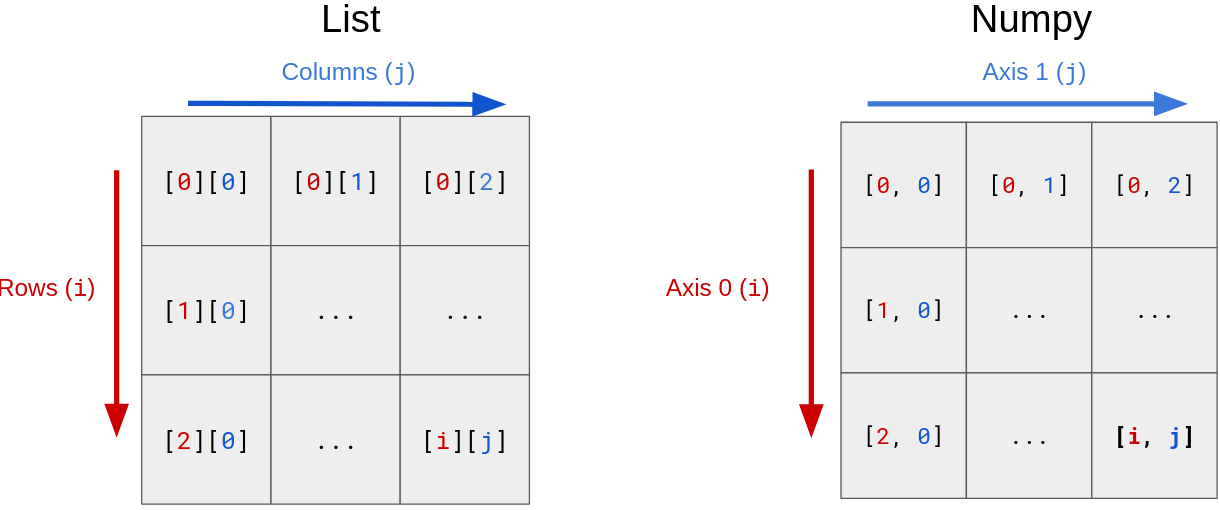

### Taking a whole dimension at once.

It was super annoying to get the 3 row of the second time point. So lets do it using the `:` symbol when we index.

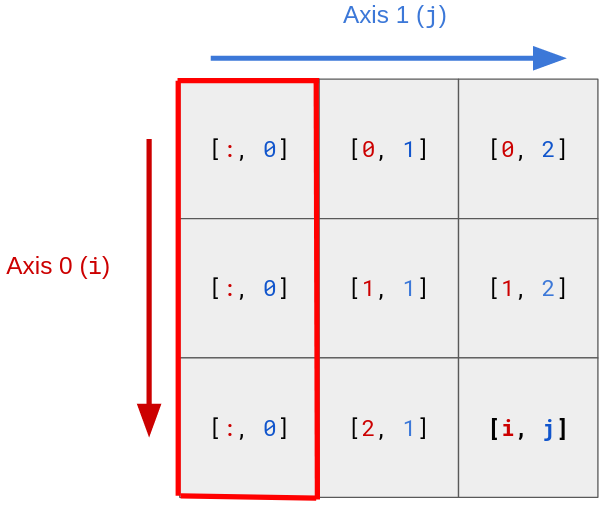

Various selections of portions of numpy arrays.

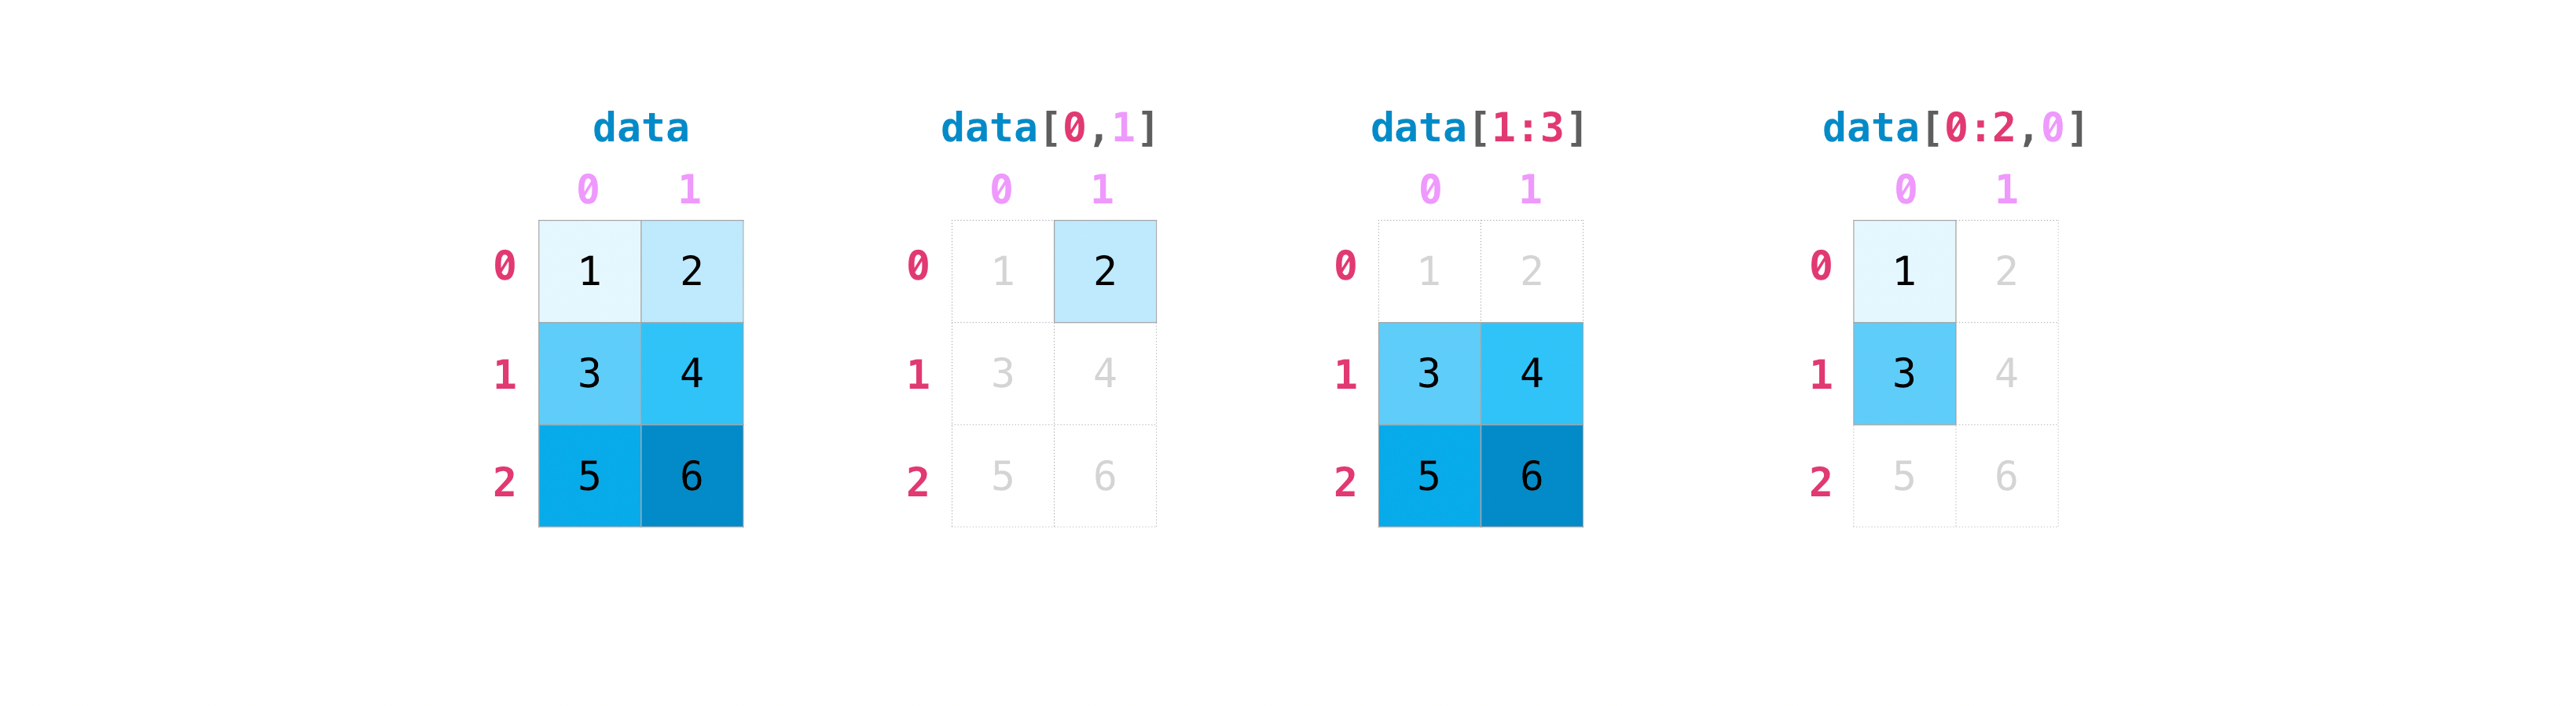

Let's try:

In [57]:
data = np.array([
    [1, 2],
    [3, 4],
    [5, 6]
])

In [58]:
data[0,1]

2

In [59]:
data[:,0]

array([1, 3, 5])

In [60]:
data[1:3]

array([[3, 4],
       [5, 6]])

In [61]:
data[:2,0]

array([1, 3])

In [62]:
# when you get confused a good thing to do is always to look at the shape of the arrad
data.shape

(3, 2)

### Applying functions along an axis

Many numpy functions accept an `axis` argument. This allows us to control if they act on specific slices of the array, or over the entire array.

<img src="../images/simple_agg.png" alt="Basic aggregation operation" width="350"> <img src="../images/matrix_aggregation.png" alt="Aggregation along " width="1100">


In [63]:
np.max(data)

6

In [64]:
data.max(0)

array([5, 6])

## Breakout Room


### 1. Conversion and indexing

Turn the `room_temp_3d` into a Numpy array. Then use this array along with indexing to print out the third column of the second time point.

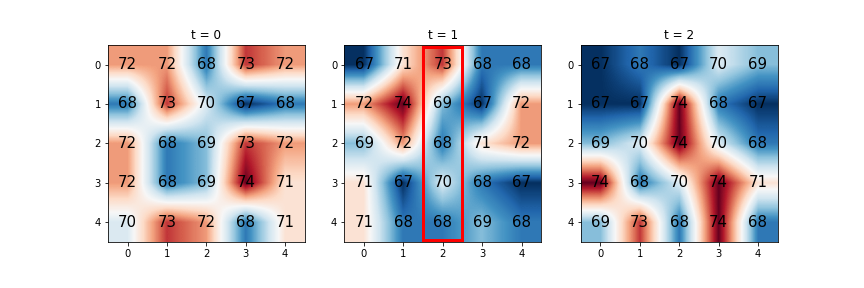

In [65]:
temp_3d = np.array(room_temp_3d)

In [66]:
temp_3d.shape

(3, 5, 5)

So the first dimension is time, the second is the rows, and the third is the columns

In [67]:
temp_3d[1,:,2]

array([73, 69, 68, 70, 68])

### 2. Temperature Conversion

Apply the Fahrenheit to Celsius conversion formulat to this array using numpy broadcasting. As a reminder the formula is

$$C = \frac{F- 32}{1.8}.$$

In [68]:
celsius_arr = (temp_3d-32)/1.8

### 3. Average Temperature

What is the average temperature over all times and all squares.

In [69]:
temp_3d.mean() # equvialent to np.mean(temp_3d)

69.98666666666666

### 4. Average temperature using `axis`

Using the `axis` argument to `np.mean` figure out:
1. The average surface temperature at each time point
2. The average surface temperature for each grid point averaged over all three time points.

In [70]:
# part 1
temp_3d.mean(-1).mean(-1) # We can still refer to the axis using the negative indices 

array([70.6 , 69.6 , 69.76])

In [71]:
# equivalent
temp_3d.mean(2).mean(1) # if you use explicit axis numbers you need to be careful about the order
                   # once you call .mean on one axis, it no longer exists so temp_3d.mean(1).mean(2) will not work

array([70.6 , 69.6 , 69.76])

**End of Breakout**

If you're done, help other people in your breakout room - or feel free to come back to the main zoom room.

-----

### More Advanced Indexing

### Indexing Arrays

In [72]:
# not limited to indexing with single numbers or ranges of numbers. We can also select multiple specific points
x = np.arange(10)**2
idx = np.array([2,2, 5, 8])

In [73]:
x

array([ 0,  1,  4,  9, 16, 25, 36, 49, 64, 81])

In [74]:
x[idx]

array([ 4,  4, 25, 64])

In [75]:
idx2 = np.array([[1, 3],[-2, -1]])

In [76]:
idx2

array([[ 1,  3],
       [-2, -1]])

In [77]:
x[idx2]

array([[ 1,  9],
       [64, 81]])

The resulting array will have the same shape as the array used for indexing.

### Boolean Indexing

In [78]:
x = np.arange(25).reshape(5,5)

In [79]:
# generate the elements that are odd
odds = x%2==1 # % is the module operator

In [80]:
#look at a boolean arrray
odds

array([[False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False],
       [ True, False,  True, False,  True],
       [False,  True, False,  True, False]])

In [81]:
#get the odd numbers
x[odds]

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23])

**Note** Boolean indexing always returns a 1D array because numpy cannot guarantee that the result will be rectangular.

Boolean indexing may not seem important in the abstract but it is incredibly useful. In the next section you'll use it to threshold images.

## Breakout

### 1. Indexing odd elements

Calculate the sum of all numbers with an odd index in the given array below.

Hint: Use `np.arange(start, stop, step)` to generate the array to use for indexing

In [82]:
arr = np.array([ 1, 10, 17, 11,  7, 17,  6, 10,  5, 13, 14,  4, 16,  1,  0,  5,  5,
       16, 11,  8,  1,  5,  6,  9, 16,  5,  9,  0, 18,  5, 10, 15,  9, 14,
        2, 18, 13,  7, 13, 16, 16,  0,  0, 14, 15,  5, 18,  5,  2, 13, 12,
       16,  4, 12,  3,  7,  7, 10,  8,  6, 13,  9, 10,  4,  1,  7, 12, 13,
        2,  2,  6, 16,  6,  4,  3, 17,  8, 10, 18,  8, 17, 10,  7,  4,  1,
        0, 10, 13,  7, 12,  8, 12, 12,  9, 12, 19,  1,  4,  9,  3])

In [83]:
idx = np.arange(1, arr.shape[0])

In [84]:
arr[idx]

array([10, 17, 11,  7, 17,  6, 10,  5, 13, 14,  4, 16,  1,  0,  5,  5, 16,
       11,  8,  1,  5,  6,  9, 16,  5,  9,  0, 18,  5, 10, 15,  9, 14,  2,
       18, 13,  7, 13, 16, 16,  0,  0, 14, 15,  5, 18,  5,  2, 13, 12, 16,
        4, 12,  3,  7,  7, 10,  8,  6, 13,  9, 10,  4,  1,  7, 12, 13,  2,
        2,  6, 16,  6,  4,  3, 17,  8, 10, 18,  8, 17, 10,  7,  4,  1,  0,
       10, 13,  7, 12,  8, 12, 12,  9, 12, 19,  1,  4,  9,  3])

### 2. Indexing even elements - multidimensional

The data we load in the next cell (`new_data`) is a multidimensional array with 3 dimensions. If the first axis represents a time axis (like the room temperature data) what is the sum of all the data at the even numbered time points?

Hint 1: Start out by looking at `new_data.shape`  
Hint 2: Use `np.arange(start, stop, step)` to generate the array to use for indexing



In [85]:
new_data = np.load('../data/odd-elem-multi-idx.npy')

In [86]:
new_data.shape

(10, 5, 5)

In [87]:
evens = np.arange(0,new_data.shape[0],2)

In [88]:
evens_arr = new_data[evens]

In [89]:
evens_arr.shape

(5, 5, 5)

In [90]:
evens_arr.sum()

519

### 3. Indexing and preserving axes.

Now use array-indexing to extract the even numbered time points in `new_data` and then use `np.mean` to get the 2D average of each time point.

In [91]:
evens_arr.mean(-1).mean(-1)

array([4.72, 3.56, 4.  , 4.2 , 4.28])

**End of Breakout**

If you're done, help other people in your breakout room - or feel free to come back to the main zoom room.

-----

# Basic plotting

**Matplotlib cheatsheets:** https://github.com/matplotlib/cheatsheets#cheatsheets


**Tutorials** https://matplotlib.org/3.3.4/tutorials/index.html  
**Good goodling phrase:** "How to make a ___ plot in matplotlib"

**Getting help**

For both of these **make sure** you post a [minimal example](https://matthewrocklin.com/blog/work/2018/02/28/minimal-bug-reports)


1. https://stackoverflow.com/
2. https://discourse.matplotlib.org/
   - More lenient with what is an acceptable question
   - monitored by the Matplotlib devs
   - Slower to get an answer than stackoverflow

### Line Plots

In [92]:
import matplotlib.pyplot as plt

In [93]:
x = np.linspace(0, 5, 200) #for making nice plots you probably want to use at least 50 points.

In [94]:
y = np.sin(3*x)*np.exp(-0.5*x)

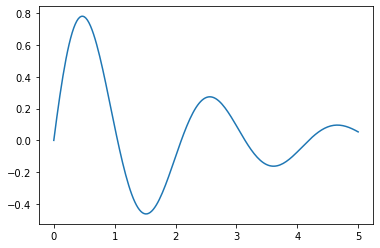

In [95]:
plt.plot(x, y)
#plt.savefig('my_figure.png') # Save the figure as a png
plt.show()

### Displaying images with imshow

In [96]:
import tifffile as tiff
import glob

If you want to follow along, you can download the dataset we use. It is the Chinese Hamster Ovarian (CHO) nuclei overexpressing GFP-PCNA training dataset from the Cell Tracking Challenge. 

[Click here to download the dataset](http://data.celltrackingchallenge.net/training-datasets/Fluo-N3DH-CHO.zip) (98MB)

Once you download the zip file, move it to the same directory as this notebook and unzip it.

In [97]:
files = sorted(glob.glob('../Fluo-N3DH-CHO/01/*'))
cho_arr = tiff.imread(files)

In [98]:
cho_arr.shape

(92, 5, 443, 512)

For future reference, these dimensions refer to (Time, Z, Y, X).

In [99]:
single_im = cho_arr[50,0]

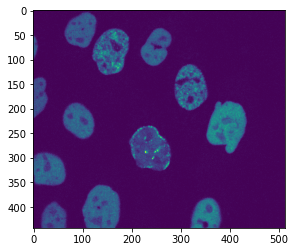

In [100]:
plt.imshow(single_im)
plt.show()

## Breakout rooms

### 1. Plotting a mathematical function

Plot  $ y(t) = e^{-5 \cdot t}$ for $t \in [0,1]$

Hint 1: Use `np.linspace` and `np.exp` to do this.  
Hint 2: Call `plt.plot` multiple times

In [101]:
t = np.linspace(0,1,200)
y = np.exp(-5*t)

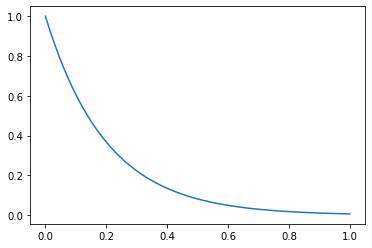

In [102]:
plt.plot(t, y)
plt.show()

## 2. Plotting many lines
Plot  $ y(t) = e^{-at}$ for $t \in [0,1]$ for these values of $a$: [1, 5, 10]

Hint: Use `np.linspace` and `np.exp` to do this.
Hint 2: Call `plt.plot` multiple times (maybe inside a for loop)

*Optional*: Matplotlib provides many functions to style your plots. Look into some of them and add them your plot. You might consider adding a [legend](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html), a [title](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html), or labels on the axes as shown below.

<img src='../images/exponentials.png' width=40%>

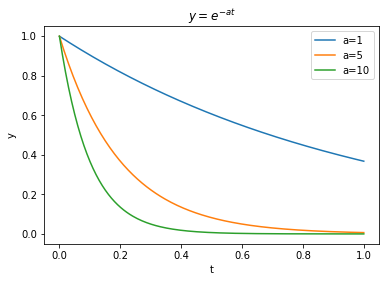

In [103]:
for a in [1,5,10]:
    plt.plot(t, np.exp(-a*t), label=f"{a=}")
plt.legend()
plt.title("$y=e^{-at}$")
plt.xlabel('t')
plt.ylabel('y')
plt.show()

## 3. Displaying Images

Use indexing to select a single time point from the `cho_data` array. Make one plot showing the *average* projection (where each pixel is averaged over the z values) and another showing the *maximum* projection (where each pixel is the maxium value of its z values). What are the differences between the two projections?

Hint: Thing about using the `axis` argument to some numpy fucntions to accomplish the projections.

In [104]:
single_time = cho_arr[50]

In [105]:
single_time.shape

(5, 443, 512)

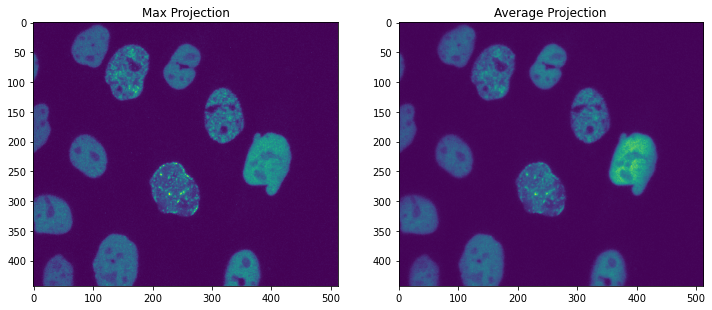

In [106]:
# its fine to do this part in two different cells and call imshow twice.
# but `plt.subplots` is the way to make multiple plots on one figure. Its very useful for making more complex figures
fig, ax = plt.subplots(1,2, figsize=(12,6)) #make it larger
ax[0].imshow(single_time.max(0))
ax[0].set_title('Max Projection')
ax[1].imshow(single_time.mean(0))
ax[1].set_title('Average Projection')
plt.show()

**End Breakout Room**


-----

In [107]:
%matplotlib widget
from mpl_interactions import hyperslicer

## `hyperslicer` - Interactive Image Viewer for Jupyter Notebooks

For image analysis projects, the first step is usually to just look at the data you have. If you are coming from an ImageJ/FIJI background, you probably arent thrilled with just plotting single images. I (John) certainly felt that way so I wrote `hyperslicer` to enable that functionality directly in a jupyter notebook.

First we need to do a few things.

In [108]:
plt.figure() #in the widget backend, you need to make a new figure every time otherwise things will get plotted where you dont expect
ctrls = hyperslicer(cho_arr)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [109]:
# Add axes keyword and play buttons
plt.figure()
ctrls = hyperslicer(cho_arr, names=('Time', 'Z'), play_buttons=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Labelled Arrays with `xarray`

As you have probably experienced with your own image data and we are beginning to see with the example dataset here, it can be annoying to keep track of what all the different dimensions of an array actually mean. In addition, sometimes they have coordinates rather than just integer values (e.g. distances for the XYZ dimensions, names for different channels, time values for time series, etc. 

[`xarray`](http://xarray.pydata.org/en/stable/) adds this capapbility on top of numpy. Today we will focus on the most direct counterpart to numpy arrays, the`DataArray`.

In [110]:
import xarray as xr

In [111]:
# Voxel size (microns): 0.202 x 0.202 x 1.0  Time step (min): 9.5
coords = {'T':9.5*np.arange(cho_arr.shape[0]), 
          'Z':1.0*np.arange(cho_arr.shape[1]),
          'Y':0.202*np.arange(cho_arr.shape[2]),
          'X':0.202*np.arange(cho_arr.shape[3])}
# In real life, you should write code that reads your metadata and produces this dictionary

In [112]:
coords

{'T': array([  0. ,   9.5,  19. ,  28.5,  38. ,  47.5,  57. ,  66.5,  76. ,
         85.5,  95. , 104.5, 114. , 123.5, 133. , 142.5, 152. , 161.5,
        171. , 180.5, 190. , 199.5, 209. , 218.5, 228. , 237.5, 247. ,
        256.5, 266. , 275.5, 285. , 294.5, 304. , 313.5, 323. , 332.5,
        342. , 351.5, 361. , 370.5, 380. , 389.5, 399. , 408.5, 418. ,
        427.5, 437. , 446.5, 456. , 465.5, 475. , 484.5, 494. , 503.5,
        513. , 522.5, 532. , 541.5, 551. , 560.5, 570. , 579.5, 589. ,
        598.5, 608. , 617.5, 627. , 636.5, 646. , 655.5, 665. , 674.5,
        684. , 693.5, 703. , 712.5, 722. , 731.5, 741. , 750.5, 760. ,
        769.5, 779. , 788.5, 798. , 807.5, 817. , 826.5, 836. , 845.5,
        855. , 864.5]),
 'Z': array([0., 1., 2., 3., 4.]),
 'Y': array([ 0.   ,  0.202,  0.404,  0.606,  0.808,  1.01 ,  1.212,  1.414,
         1.616,  1.818,  2.02 ,  2.222,  2.424,  2.626,  2.828,  3.03 ,
         3.232,  3.434,  3.636,  3.838,  4.04 ,  4.242,  4.444,  4.646,
     

In [113]:
cho_data_arr = xr.DataArray(cho_arr, dims=coords.keys(), coords=coords)

In [114]:
cho_data_arr

<xarray.DataArray (T: 92, Z: 5, Y: 443, X: 512)>
array([[[[70, 53, 53, ...,  5, 10,  5],
         [65, 77, 47, ...,  5,  5,  5],
         [33, 45, 58, ...,  5,  5,  6],
         ...,
         [ 6,  8,  7, ...,  8, 10,  6],
         [ 7,  5,  6, ...,  5,  5,  6],
         [12,  5,  5, ...,  6,  5,  5]],

        [[75, 32, 56, ...,  5,  6,  5],
         [41, 38, 45, ..., 11,  5,  8],
         [96, 58, 53, ...,  5,  5,  5],
         ...,
         [ 5,  5,  5, ...,  6,  7,  5],
         [ 5,  5,  6, ...,  5,  5,  5],
         [ 6,  5,  5, ...,  8,  5,  5]],

        [[40, 43, 36, ...,  5,  7,  5],
         [31, 42, 66, ...,  5, 13,  5],
         [48, 39, 73, ...,  5,  4,  5],
         ...,
...
         ...,
         [ 5,  5,  5, ...,  5,  5,  5],
         [ 5,  5,  5, ...,  5,  5,  5],
         [ 5,  5,  5, ...,  5,  8,  5]],

        [[ 6,  6,  5, ...,  5,  5,  5],
         [ 6,  8,  7, ...,  5,  5,  6],
         [ 6, 10,  5, ...,  5,  5,  5],
         ...,
         [ 8,  5,  5, ...,  6,  5,  5],
         [ 5,  7,  5, ...,  6,  6,  5],
         [ 5,  7,  9, ...,  6,  7,  5]],

        [[ 5,  5,  5, ...,  5, 13,  5],
         [ 5,  5,  5, ...,  6,  5,  5],
         [ 5,  6,  5, ...,  5,  5,  5],
         ...,
         [ 5,  5,  6, ...,  5,  5,  8],
         [ 5,  5,  5, ...,  5,  6,  5],
         [ 8,  5,  6, ...,  5,  5,  5]]]], dtype=uint8)
Coordinates:
  * T        (T) float64 0.0 9.5 19.0 28.5 38.0 ... 836.0 845.5 855.0 864.5
  * Z        (Z) float64 0.0 1.0 2.0 3.0 4.0
  * Y        (Y) float64 0.0 0.202 0.404 0.606 0.808 ... 88.68 88.88 89.08 89.28
  * X        (X) float64 0.0 0.202 0.404 0.606 0.808 ... 102.6 102.8 103.0 103.2

In [115]:
# max project z
cho_max_z = cho_data_arr.max('Z')

In [116]:
#select the point at the two hour mark
cho_data_arr.sel(T=120, method='nearest') #there isnt a point exactly at 120 minutes so xarray gets the closest

<xarray.DataArray (Z: 5, Y: 443, X: 512)>
array([[[ 7,  5, 14, ..., 10,  7,  8],
        [ 5, 10,  8, ...,  6,  8, 11],
        [ 5,  7,  8, ...,  7,  5, 10],
        ...,
        [ 5,  5,  5, ...,  5,  5,  5],
        [ 5,  5,  6, ...,  5,  7,  5],
        [ 5,  9,  6, ...,  5,  5,  5]],

       [[ 6, 12,  5, ...,  7,  4, 10],
        [ 6,  5,  5, ...,  5,  5,  6],
        [ 6,  9, 12, ...,  8,  7,  7],
        ...,
        [ 5,  5,  7, ...,  5,  8,  5],
        [ 5,  7,  5, ...,  5,  9,  5],
        [ 5,  5,  5, ...,  5, 13, 11]],

       [[ 5,  6, 14, ...,  5,  7,  5],
        [ 5,  5,  6, ...,  5,  5,  5],
        [ 5,  6,  5, ...,  6,  5,  5],
        ...,
        [ 5,  5,  5, ...,  5,  5,  7],
        [ 5,  5,  5, ...,  5,  5,  6],
        [ 5,  6, 10, ...,  5,  5,  8]],

       [[ 5,  5,  5, ...,  8,  7,  5],
        [ 5,  5,  5, ...,  5,  5,  6],
        [ 5,  5,  5, ...,  5,  7,  5],
        ...,
        [ 5,  5,  5, ...,  5,  5,  5],
        [ 5,  5,  5, ...,  5,  5,  5],
        [ 5,  5,  5, ...,  6,  7,  5]],

       [[ 5,  5,  5, ...,  5,  5,  5],
        [ 5,  5,  5, ...,  5,  5,  5],
        [ 6,  5,  7, ...,  5,  5,  5],
        ...,
        [ 5,  8,  5, ...,  5,  6,  6],
        [ 9,  5,  4, ...,  5,  9,  5],
        [ 5,  5,  5, ...,  7,  5,  5]]], dtype=uint8)
Coordinates:
    T        float64 123.5
  * Z        (Z) float64 0.0 1.0 2.0 3.0 4.0
  * Y        (Y) float64 0.0 0.202 0.404 0.606 0.808 ... 88.68 88.88 89.08 89.28
  * X        (X) float64 0.0 0.202 0.404 0.606 0.808 ... 102.6 102.8 103.0 103.2

In [117]:
#select the an 80x80 micron square
cho_data_arr.sel(Y=slice(5,85), X=slice(10, 90))

<xarray.DataArray (T: 92, Z: 5, Y: 396, X: 396)>
array([[[[ 23,  28,  33, ...,   7,   5,   5],
         [ 22,  53,  35, ...,   5,   5,   7],
         [ 36,  46,  73, ...,  11,   9,  10],
         ...,
         [ 11,  26,  38, ...,   5,   5,   6],
         [ 11,  13,  38, ...,  10,   5,   5],
         [ 22,  17,  46, ...,   5,   6,   5]],

        [[  9,  14,  26, ...,   5,   5,   5],
         [ 26,  14,  24, ...,   5,   9,   5],
         [ 26,  19,  29, ...,   8,   5,   5],
         ...,
         [ 13,   9,  22, ...,  10,   5,   5],
         [ 10,  16,  22, ...,   5,  11,   8],
         [ 14,   7,  24, ...,   5,   5,   5]],

        [[ 13,   6,   6, ...,   5,   6,   5],
         [ 18,   7,  11, ...,   5,   7,   5],
         [ 15,  13,  17, ...,   5,   5,   6],
         ...,
...
         ...,
         [ 11,  22,  19, ...,  24,  22,  11],
         [ 13,  22,  18, ...,  21,  11,  16],
         [ 17,   8,  18, ...,  20,  21,  13]],

        [[  5,   5,   5, ...,   5,   5,   5],
         [  5,   5,   5, ...,   8,   8,  10],
         [  7,  10,   9, ...,   5,   5,   5],
         ...,
         [  9,  16,  11, ...,  11,  14,   8],
         [  9,  18,   6, ...,  19,  13,   9],
         [ 12,   8,   7, ...,  17,   7,   5]],

        [[  5,   5,   5, ...,   5,   5,   5],
         [  7,   5,   8, ...,   5,   5,   4],
         [  5,   5,   5, ...,   5,   5,   5],
         ...,
         [  7,   9,   6, ...,  10,   8,   8],
         [  5,  10,  10, ...,   5,  13,   6],
         [ 13,   5,   9, ...,   5,   6,   7]]]], dtype=uint8)
Coordinates:
  * T        (T) float64 0.0 9.5 19.0 28.5 38.0 ... 836.0 845.5 855.0 864.5
  * Z        (Z) float64 0.0 1.0 2.0 3.0 4.0
  * Y        (Y) float64 5.05 5.252 5.454 5.656 ... 84.23 84.44 84.64 84.84
  * X        (X) float64 10.1 10.3 10.5 10.71 10.91 ... 89.28 89.49 89.69 89.89

In [120]:
# save data to nc file
cho_data_arr.to_netcdf('cho_dataarray.nc') 

In [121]:
#later you can simple use 
cho_loaded = xr.load_dataarray('cho_dataarray.nc')

**Notes**

- This is scratching the surface of what xarray can do. I would strongly recommend reading their docs/tutorials to learn more.
- The above is especially true for indexing; using `DataArray`s to index other `DataArray`s is incredibly powerful.
- Saving data to netCDF files (which are essentially a flavor of HDF5) will greatly speed up the reading process and make it more convenient to load data directly into xarray.

## `hyperslicer` supports `xarray`

In [122]:
plt.figure()
ctrls = hyperslicer(cho_data_arr)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Other resources

**General python introductions**
- [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) (Also covers numpy and matplolib)
- [Learn Python](https://www.learnpython.org/)
- [Learn to Code in Python](https://repl.it/talk/learn/Learn-To-Code-In-Python/7485)

**Documentation**

- [Numpy user guide](https://numpy.org/doc/1.20/user/index.html)
- [Xarray docs](http://xarray.pydata.org/en/stable/index.html) -- *NB* `xarray` came out of the earth science community so the documentation is really focused on stuff like global temperature data. It is increasing in popularity among microscopists and hopefully their docs with reflect that eventually.
- [mpl-interactions](https://mpl-interactions.readthedocs.io/en/stable/) -- [hyperslicer tutorial](https://mpl-interactions.readthedocs.io/en/stable/examples/hyperslicer.html)

10 Minute Break

----

## Time Permitting: An aside on reusable code

If you write code to do something useful you should wrap that code into a function. Its worth taking the time to make sure your code is a good balance of flexible and robust before you wrap it into a function. My personal rule about this is that if I end up copying something 3 times it needs to go into a function.

In [123]:
def my_function(x,y,z):
    return (4*x-3*y)/(2*z)

In [124]:
my_function(1,2,5)

-0.2

In [125]:
x = np.linspace(0,5, 50)
y = np.linspace(2, 7, 50)
z = np.linspace(1,6, 50)

In [126]:
my_function(x,y,z)

array([-3.        , -2.67592593, -2.40677966, -2.1796875 , -1.98550725,
       -1.81756757, -1.67088608, -1.54166667, -1.42696629, -1.32446809,
       -1.23232323, -1.14903846, -1.0733945 , -1.00438596, -0.94117647,
       -0.88306452, -0.82945736, -0.77985075, -0.73381295, -0.69097222,
       -0.65100671, -0.61363636, -0.57861635, -0.54573171, -0.5147929 ,
       -0.48563218, -0.45810056, -0.43206522, -0.40740741, -0.38402062,
       -0.36180905, -0.34068627, -0.32057416, -0.30140187, -0.28310502,
       -0.265625  , -0.2489083 , -0.23290598, -0.21757322, -0.20286885,
       -0.18875502, -0.17519685, -0.16216216, -0.14962121, -0.13754647,
       -0.12591241, -0.11469534, -0.10387324, -0.09342561, -0.08333333])

If you have several functions, you should put them in a `.py` file and import them. (You should also write some documentation so you and others can know what functions do.) With this simple setup, *you need to have the `.py` file in the same directory as your notebook.*

In [127]:
from myfuncs import normalize

In [128]:
v = np.random.randn(5)

In [129]:
v

array([-0.9797549 ,  0.185389  , -0.64959421, -0.57566637, -1.90933386])

In [130]:
normalize(v)

array([-0.42188474,  0.07982893, -0.27971678, -0.24788328, -0.82216361])

If you want to use your functions across different projects or distribute it to other people, you should make a `module`

1. Make a directory and put your `.py` files inside.
1. Make a file called `__init__.py` and `import *` from each of your files
1. In the folder that contains the module directory make a file called `setup.py`. In this file you need to 
    1. `from setuptools import setup`
    1. Run the setup command with the relevant info. See example.
1. Finally to install the package navigate to the directory containing `setup.py` and at a command prompt run `pip install -e .`. This installs the module in editable mode so any changes you make to the contents will be reflected in code that imports the module.
1. At this point, you could also post your project on something like github so other people could find and use it.

Here is a [good tutorial](https://betterscientificsoftware.github.io/python-for-hpc/tutorials/python-pypi-packaging/#creating-a-python-package) for making a package installable. It even goes into how appreciably more detail that I had time for here including to submit your project to [PyPI](https://pypi.org/).